# Ödev 1
Bu ödevin amacı, iris veri kümesine k-ortalama uygulamak ve k değerini değiştirdiğinde ne olacağını görmektir. Varsa, hangi çözümü en iyi olarak görüyorsunuz? Karmaşıklık bu veri kümesinde bir sorun olmaya başlıyor mu? Bulgularınızı mentörle paylaşın. 3'ten fazla kümey içeren bir sonuç bulabileceğinizi aklınızdan çıkarmayın.Bu kümelerden ikisi tek bir çiçek türüyle eşleşirken, diğer ikisi örneğin diğer türlerle eşlenir.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

# Loading the data from Sklearn's datasets
iris = datasets.load_iris()
X = iris.data
y1 = iris.target

# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

Verilerimizde üç sınıf iris bitki türü bulunduğundan, n_clusters = 3 yaparak k-ortalama komutunu çalıştırıyoruz.

In [2]:
# Defining the k-means
kmeans_küme = KMeans(n_clusters=3, random_state=123)

# Fit model
%timeit kmeans_küme.fit(X_std)
y1_pred = kmeans_küme.predict(X_std)

13 ms ± 1.78 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


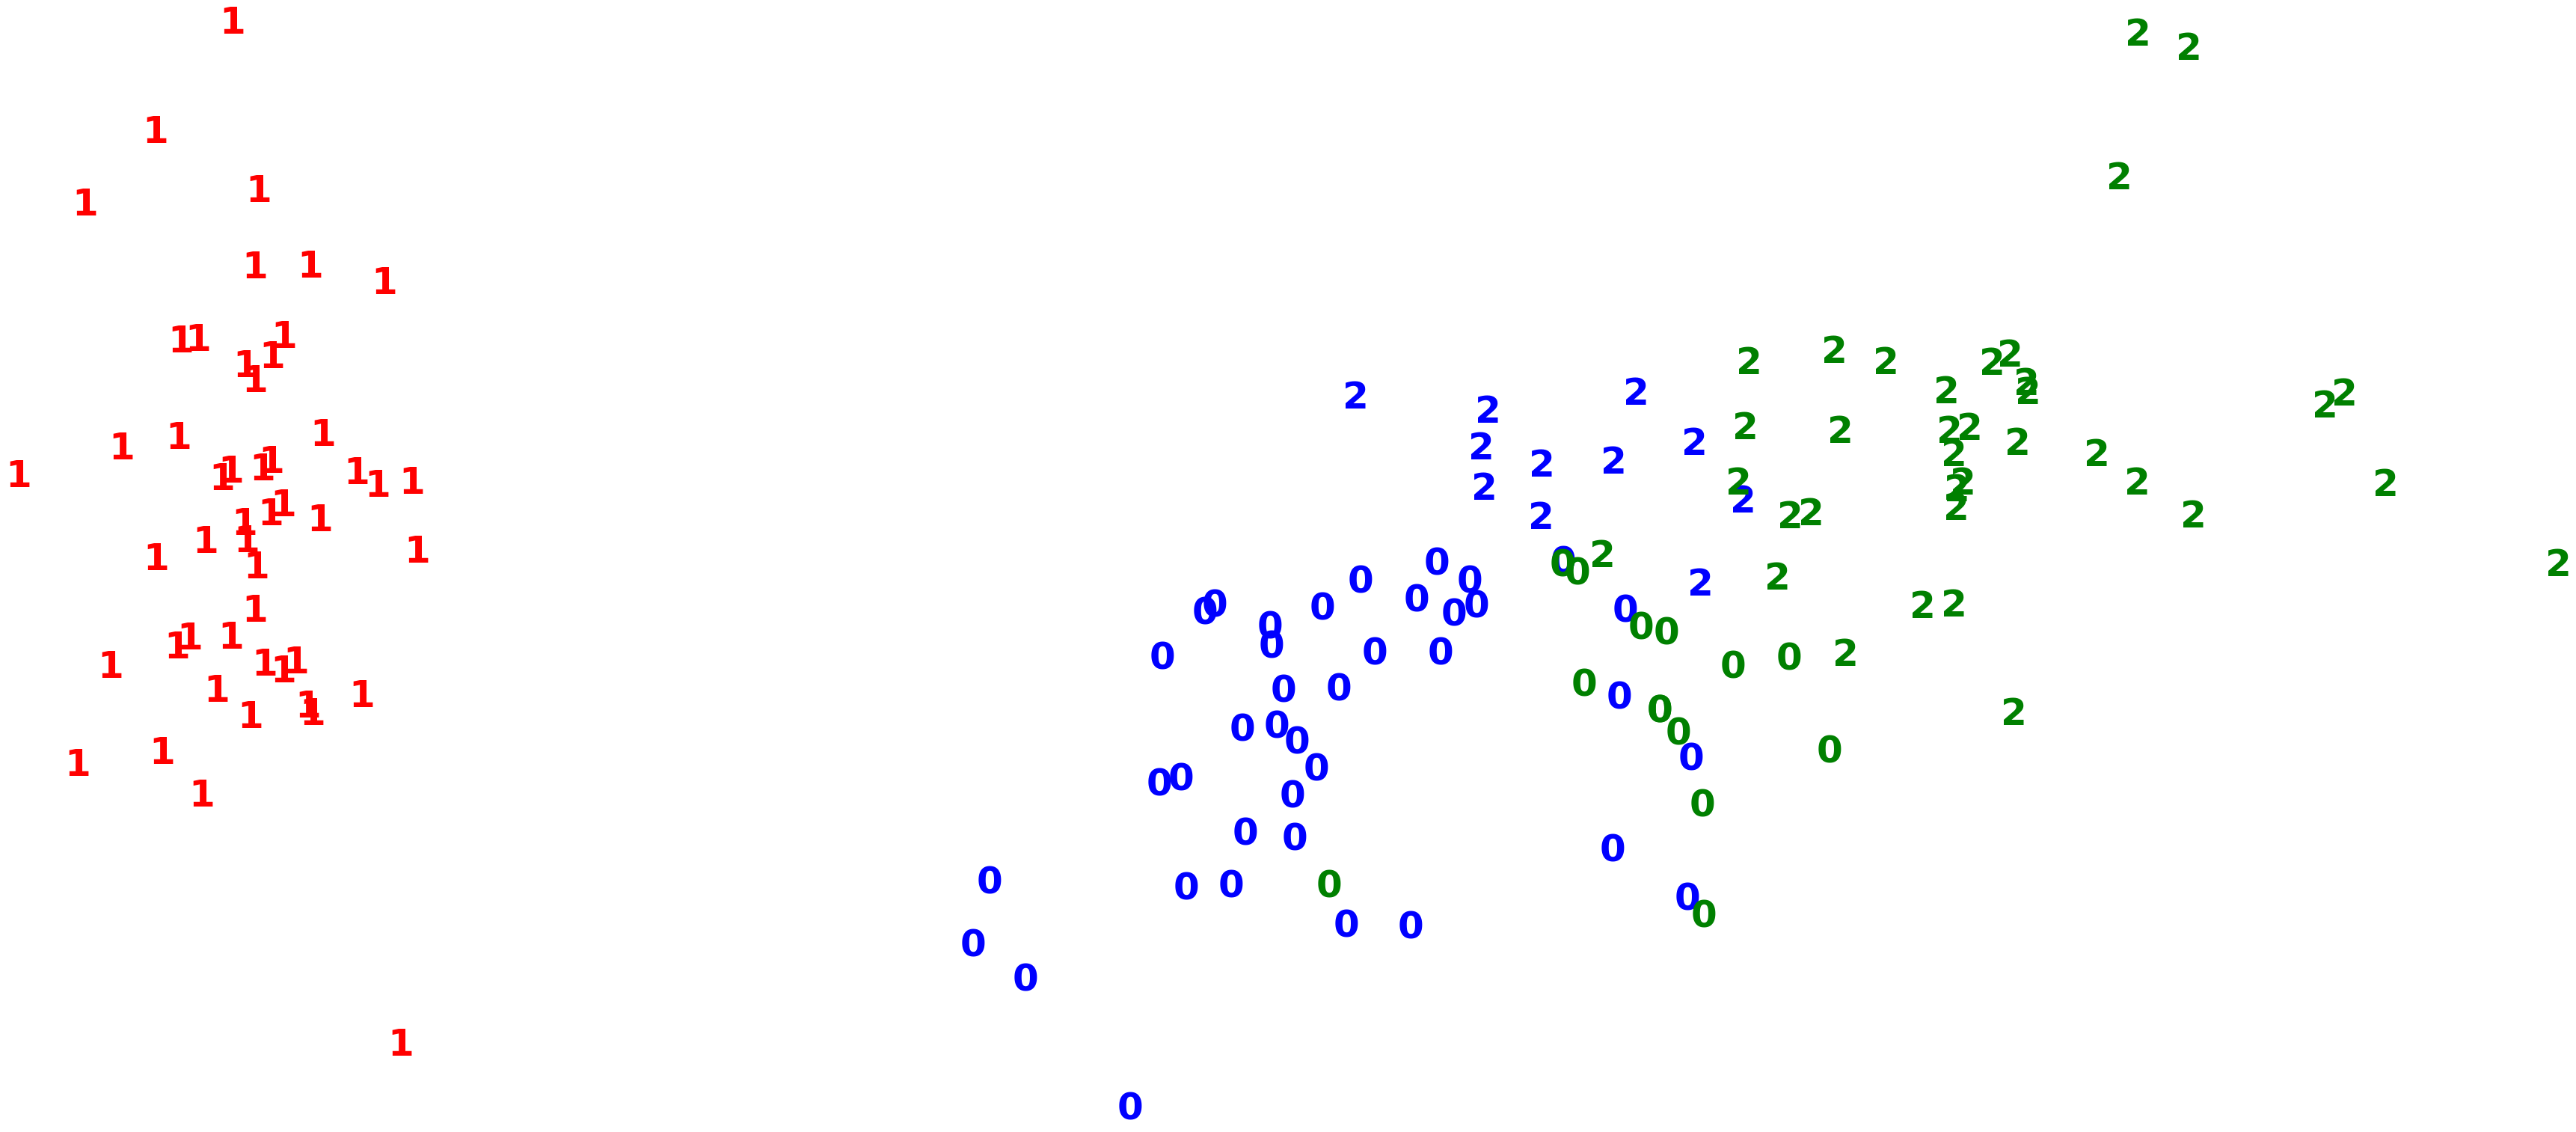

In [4]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y1_pred[i]),
             color=colours[y1[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Fena değil! K-ortalama, doğrusal olarak ayrılabilir sınıfı diğer ikisinden başarıyla ayırıyor gibi görünüyor. Ancak, ayrılmaz iki sınıf için, algoritma bazı yanlış atanmış tahminler de üretti.

Şimdi, mini-batch k-ortalama'yı deneyelim:

4.36 ms ± 245 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


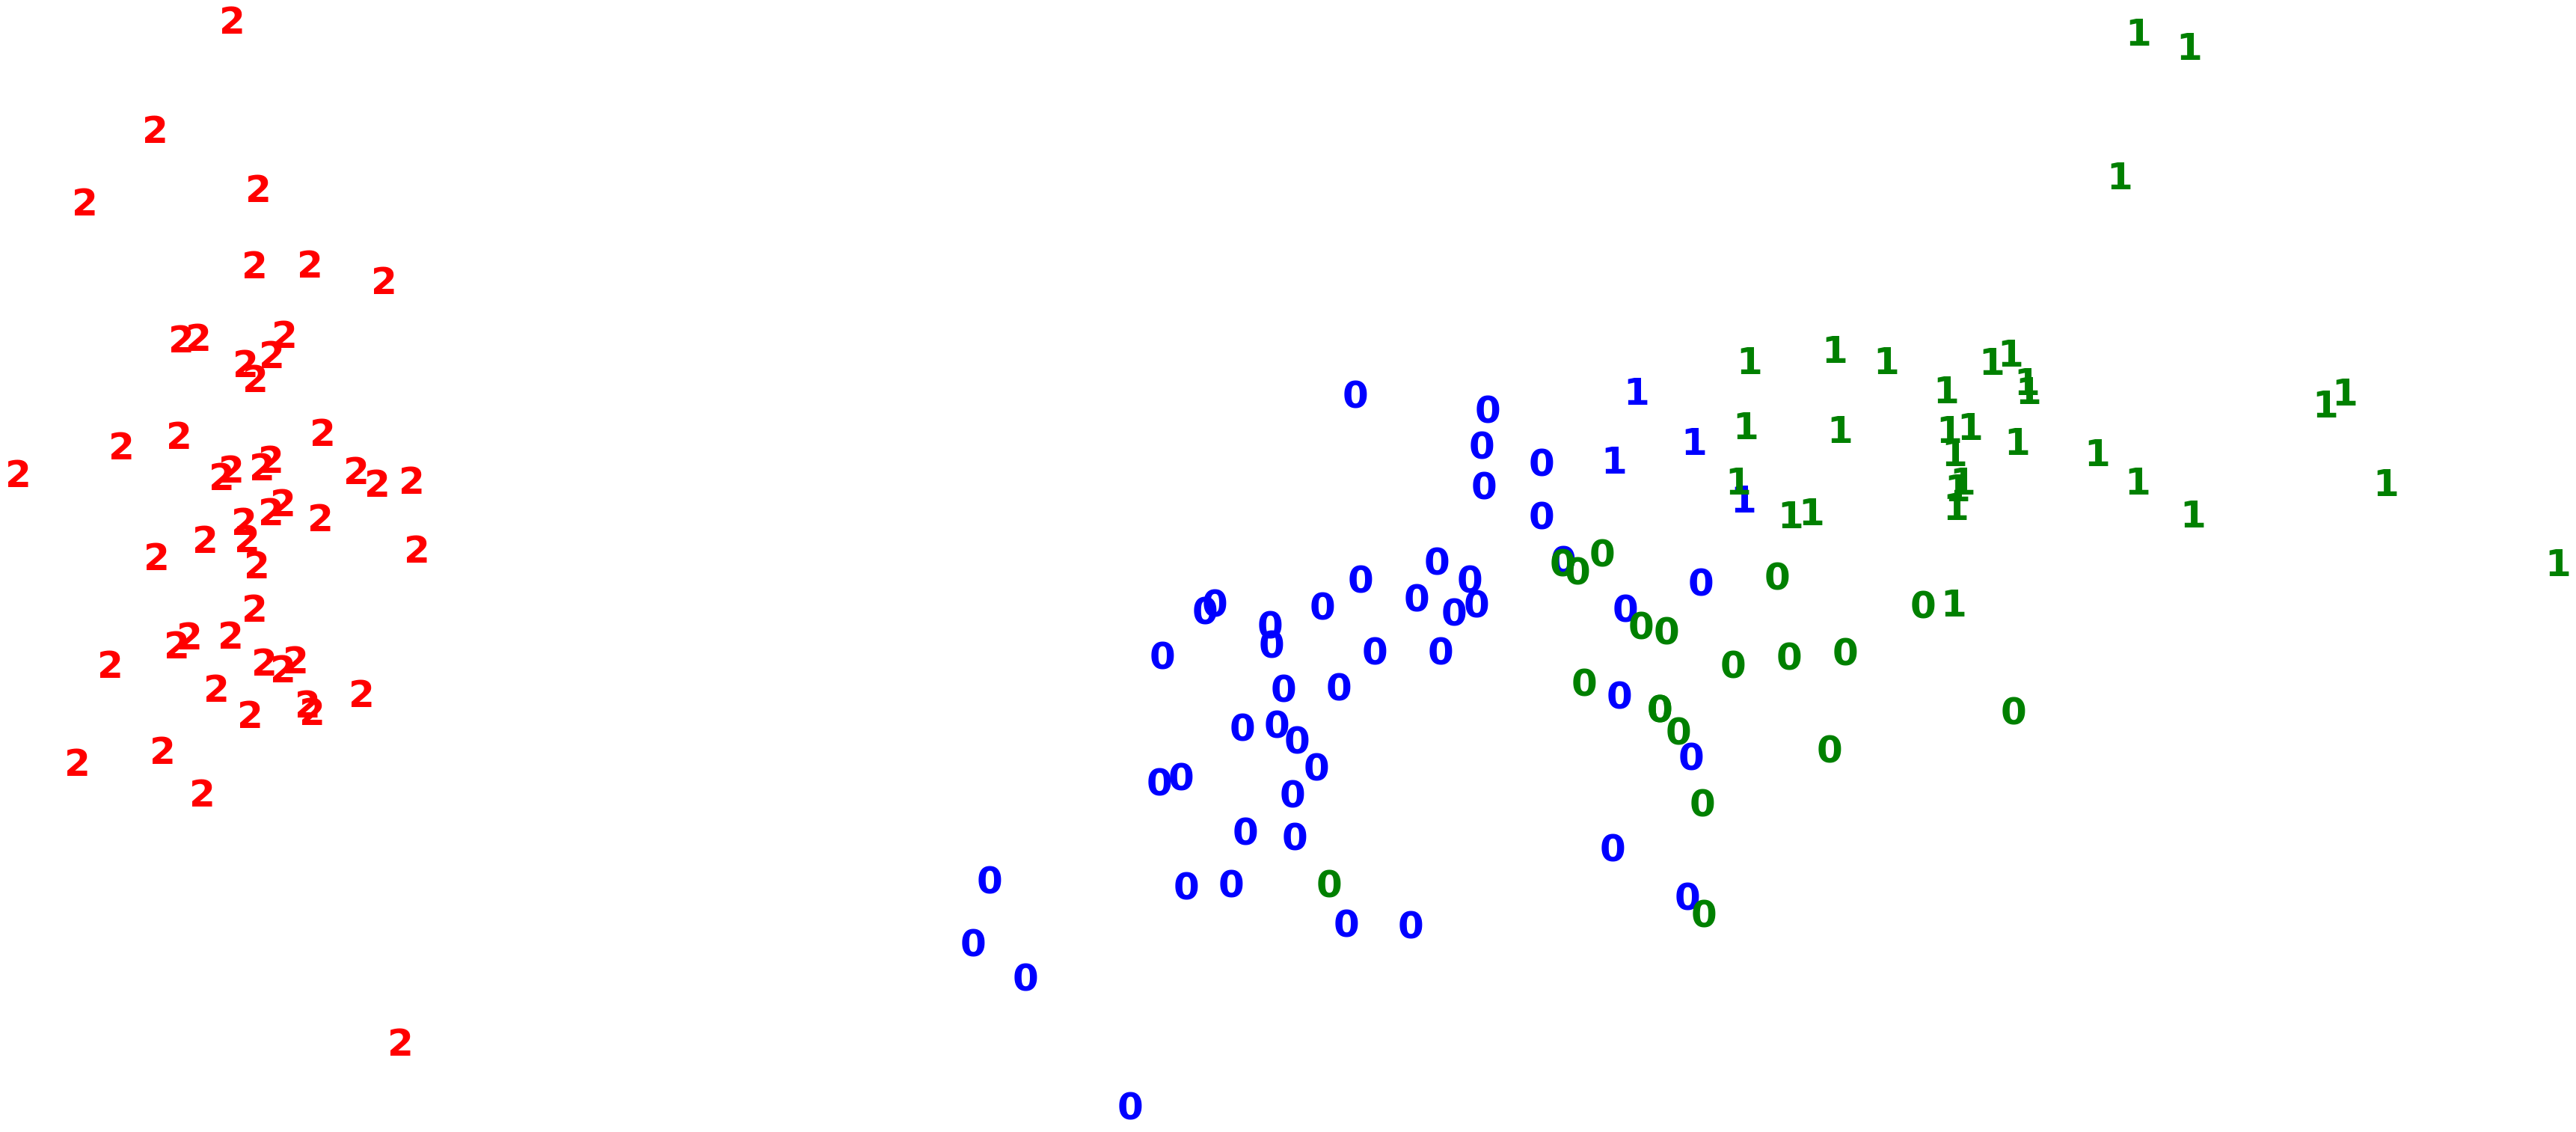

In [5]:
# Defining the mini-batch k-means
minikmeans_cluster = MiniBatchKMeans(
    init='random',
    n_clusters=3,
    batch_size=50)

# Fit model
%timeit minikmeans_cluster.fit(X_std)
minikmeans_cluster = minikmeans_cluster.predict(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(minikmeans_cluster[i]),
             color=colours[y1[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
# KMeans model with 5 clusters

In [6]:
# Defining the k-means
kmeans_küme5 = KMeans(n_clusters=5, random_state=123)

# Fit model
%timeit kmeans_küme5.fit(X_std)
y_pred5 = kmeans_küme5.predict(X_std)

21.3 ms ± 1.21 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


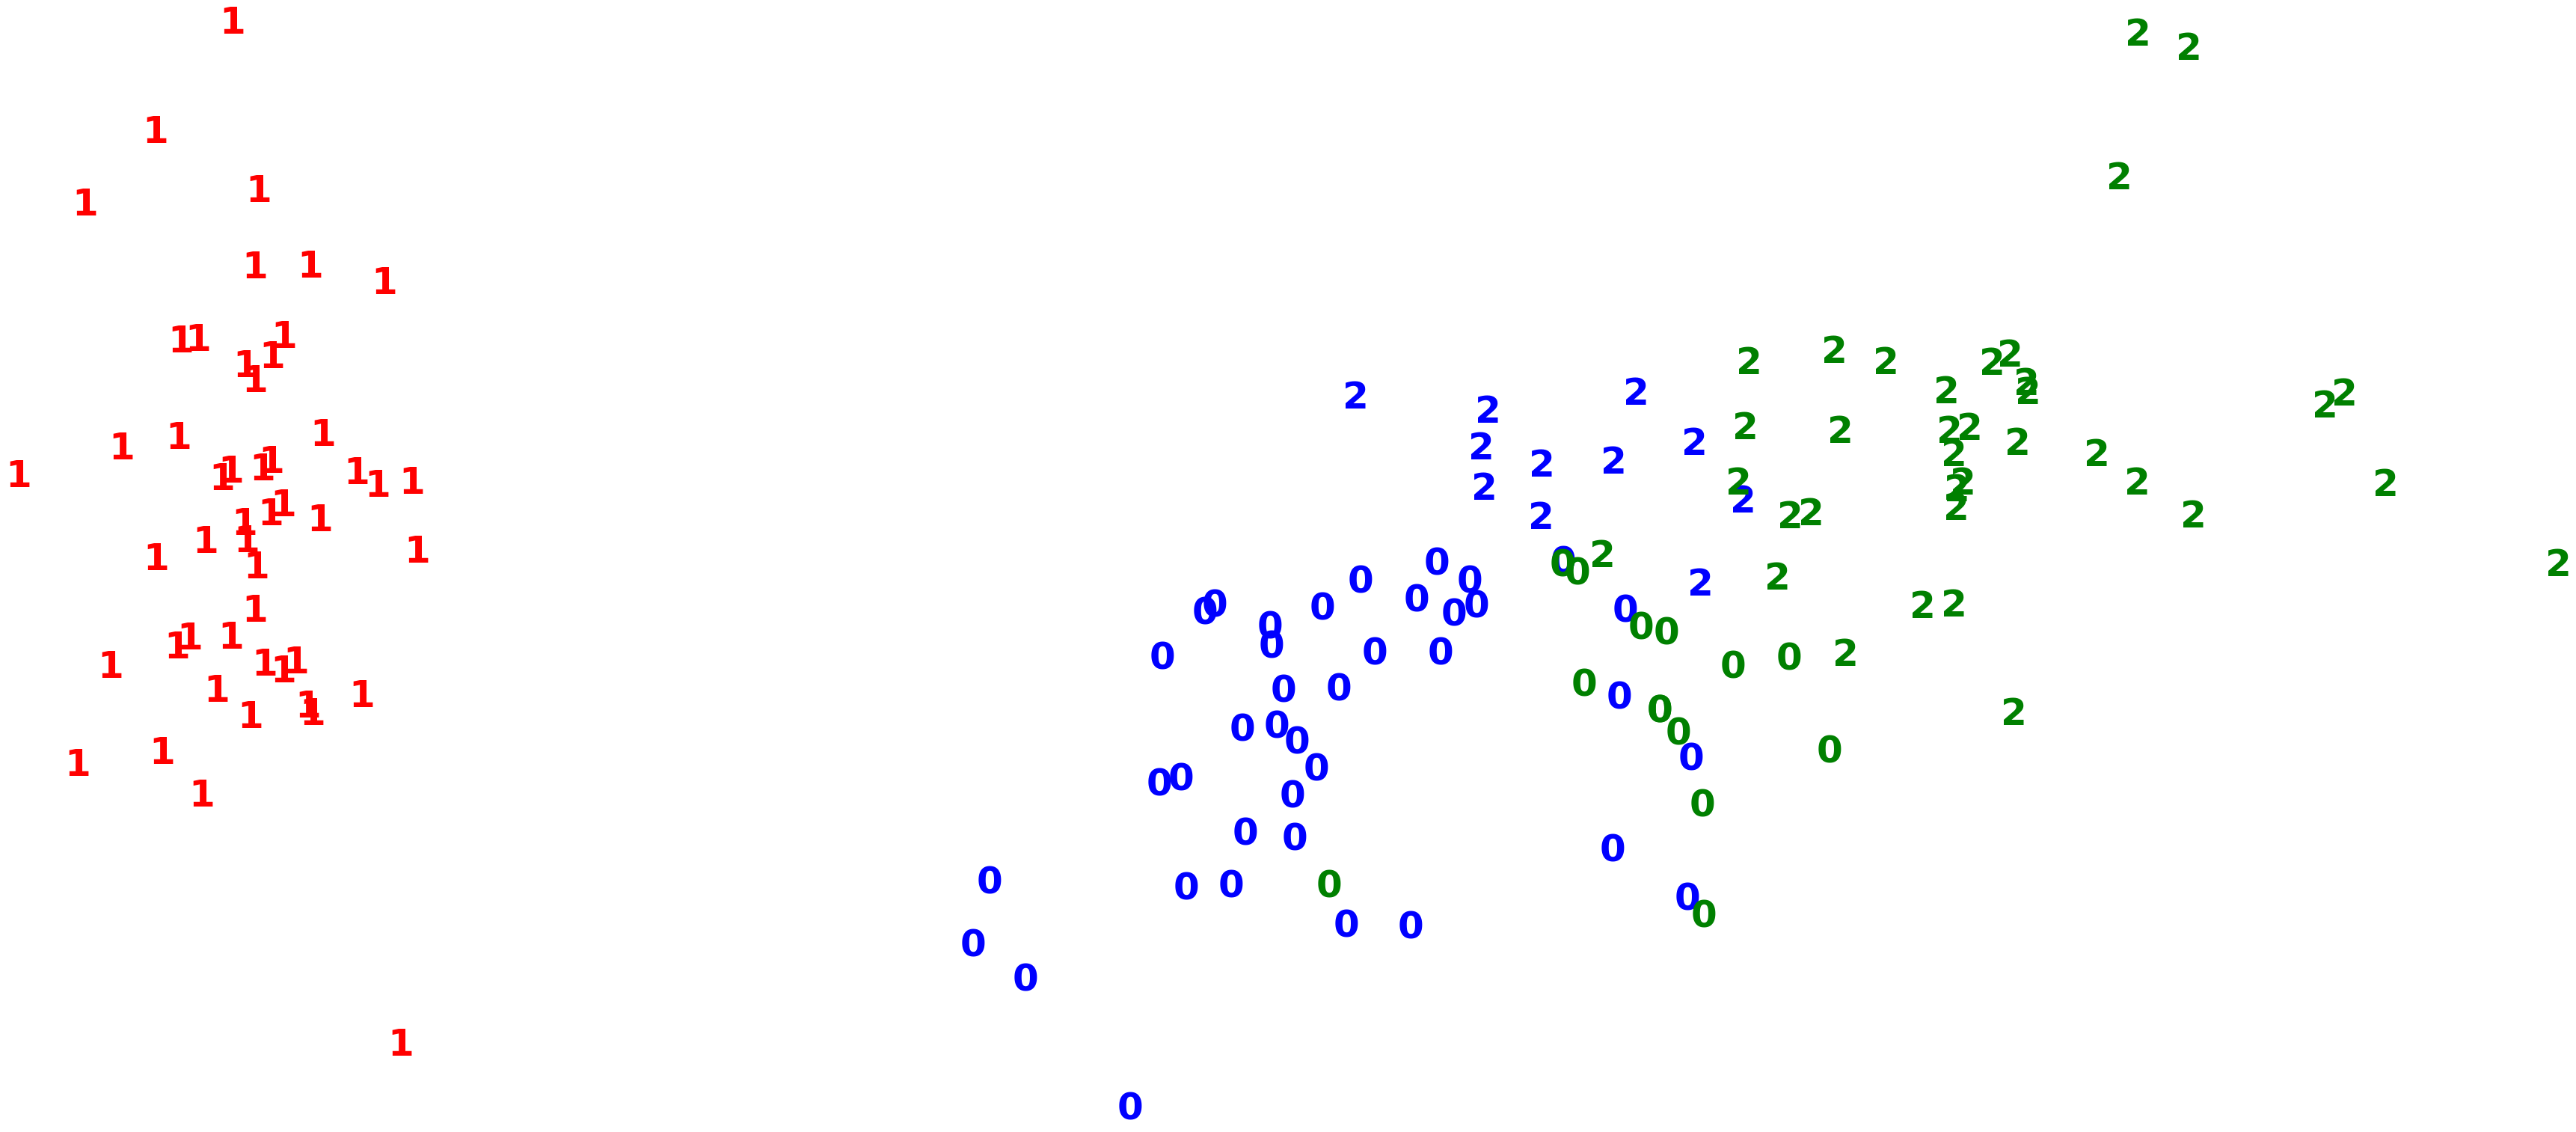

In [8]:
pca2 = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca2[i, 1], str(y1_pred[i]),
             color=colours[y1[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

# Ödev 2
Bu ödevde, UC Irvine Machine Learning Repository'de bulunan kalp hastalığı veri setiyle çalışacaksınız.

Veri setini kullanmadan önce bazı ön işlemler yapmanız gerekiyor:

#Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

#Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

#Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)
Burada, X sizin özellikleriniz olacak ve y içinde etiketleri tutuyoruz. Y, 1'e eşitse, o zaman karşılık gelen hastanın kalp hastalığı olduğunu ve y 0'a eşitse, hastanın kalp hastalığı olmadığını gösterir.

Hastaları "kalp hastalığı tanısı" veya "kalp hastalığı tanısı yok" kümelerine doğru şekilde atayan bir k-ortalama çözümü oluşturun. Bu durumda, aslında iki olan verideki doğru küme sayısını biliyoruz. Ancak burada, k-ortalamanın beklediğimiz şekilde gözlemleri atayıp atamadığını test edeceksiniz. K-ortalama, denetimsiz bir öğrenme algoritması olduğu için, hastaların kalp hastalığı olup olmadığına karşı kör olacaktır.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

heartdisease_df = pd.read_csv('cleveland-0_vs_4.csv')

In [10]:
heartdisease_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,negative
1,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,negative
2,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,negative
3,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,negative
4,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,64.0,1.0,4.0,145.0,212.0,0.0,2.0,132.0,0.0,2.0,2.0,2.0,6.0,positive
173,38.0,1.0,1.0,120.0,231.0,0.0,0.0,182.0,1.0,3.8,2.0,0.0,7.0,positive
174,61.0,1.0,4.0,138.0,166.0,0.0,2.0,125.0,1.0,3.6,2.0,1.0,3.0,positive
175,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,positive


In [11]:
for i in ["ca", "thal", "num"]:
    print(f"{i} Column values:\n {heartdisease_df[i].unique()}\n")

ca Column values:
 ['0.0' '2.0' '1.0' '3.0' '<null>']

thal Column values:
 ['6.0' '3.0' '7.0' '<null>']

num Column values:
 ['negative' 'positive']



In [12]:
# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
heartdisease_df.num = heartdisease_df.num.replace('negative', 0)
heartdisease_df.num = heartdisease_df.num.replace('positive', 1)

In [13]:
print(heartdisease_df.loc[heartdisease_df['ca'] == '<null>'])
print(heartdisease_df.loc[heartdisease_df['thal'] == '<null>'])

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
85   52.0  1.0  3.0     138.0  223.0  0.0      0.0    169.0    0.0      0.0   
142  58.0  1.0  2.0     125.0  220.0  0.0      0.0    144.0    0.0      0.4   
146  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope      ca thal  num  
85     1.0  <null>  3.0    0  
142    2.0  <null>  7.0    0  
146    1.0  <null>  3.0    0  
     age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
44  53.0  0.0  3.0     128.0  216.0  0.0      2.0    115.0    0.0      0.0   

    slope   ca    thal  num  
44    1.0  0.0  <null>    0  


In [14]:
heartdisease_df = heartdisease_df.drop([44,85,142,146])

In [22]:
# Define the features and the outcome
X2 = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

In [16]:
# Standarizing the features
scaler2 = StandardScaler()
X2_std = scaler2.fit_transform(X2)

In [17]:
# Defining the k-means
kmeans_küme2 = KMeans(n_clusters=2, random_state=123)

# Fit model
%timeit kmeans_küme2.fit(X2_std)
y3_pred = kmeans_küme2.predict(X2_std)

15.8 ms ± 729 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


KeyError: 44

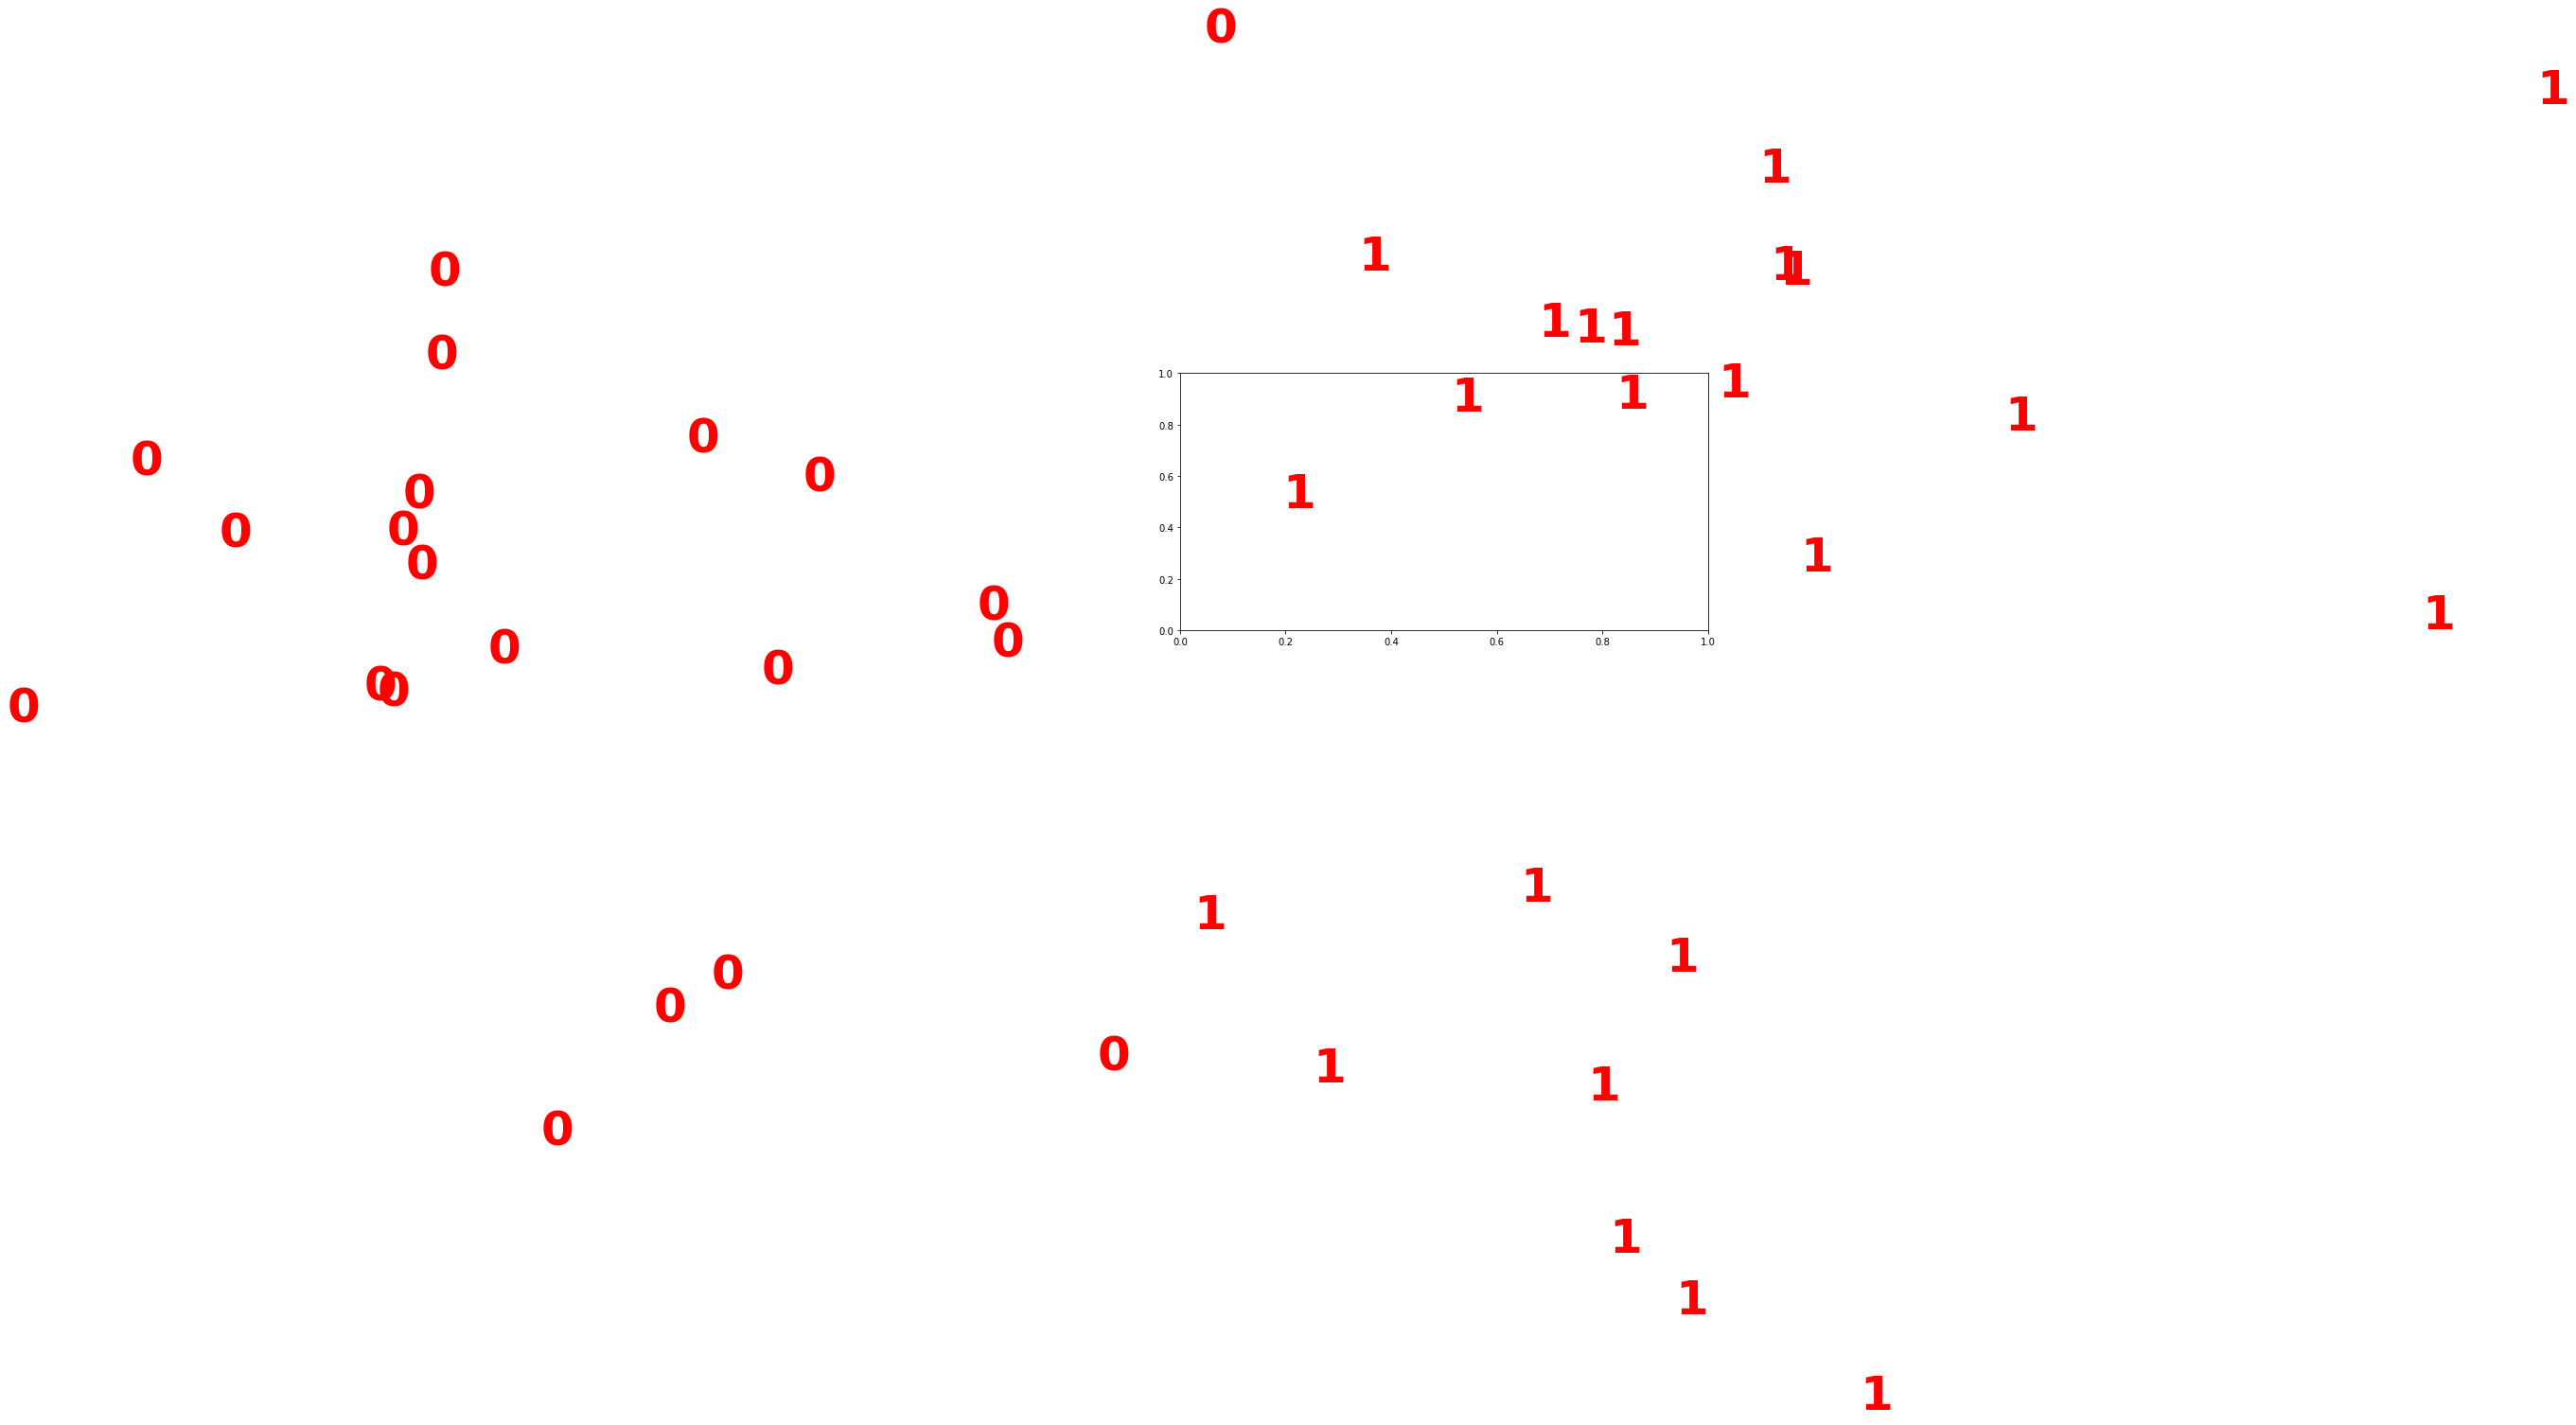

In [23]:
pca3 = PCA(n_components=2).fit_transform(X2_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for a in range(pca3.shape[0]):
    plt.text(pca3[a, 0], pca3[a, 1], str(y3_pred[a]),
             color=colours[y[a]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()